In [1]:
import sys
sys.path.append('../pyorderedfuzzy')
sys.path.append('../pyimgamo')

In [2]:
import numpy as np
import imgamo
import problems
from problems import Kursawe
from players import ClonalSelection, SimulatedAnnealing, SimpleGeneticAlg, Player
from operators import hiper_mutate
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
nvars = 3
nobjs = 2
bounds = ((-5.0, 5.0),) * nvars

In [4]:
problem = Kursawe(nvars=nvars, nobjs=nobjs, bounds=bounds, need_repair=False)

In [5]:
solutions = np.random.random(size=(100000, 3))

In [6]:
problem.evaluate_all(solutions)

array([[-17.29243181,   4.46823332],
       [-17.3738163 ,   4.51014002],
       [-17.1701264 ,   6.31799287],
       ...,
       [-16.24918207,   7.34119034],
       [-16.15310959,   6.93106593],
       [-15.40075299,  13.25526678]])

In [9]:
%%timeit
problem.evaluate_one(solutions, 0)

5.11 ms ± 69.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
problem.evaluate_one_c(solutions, 0)

6.14 ms ± 65.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
from numba import cfunc, types, carray
import ctypes

In [12]:
c_sig = types.void(types.CPointer(types.double), types.CPointer(types.double), types.intc, types.intc, types.intc)

@cfunc(c_sig)
def _evaluate_one(in_, out, n, m, i):
    solutions = carray(in_, (n, m))
    out_array = carray(out, (n,))
    if i == 0:
        out_array[:] = np.sum(-10.0 * np.exp(-0.2 * np.sqrt(solutions[:, :-1] ** 2 + solutions[:, 1:] ** 2)), axis=1)[:]
    if i == 1:
        out_array[:] = np.sum(np.abs(solutions) ** 0.8 + 5.0 * np.sin(solutions ** 3), axis=1)[:]

In [13]:
_evaluate_one.compile()

In [14]:
%%timeit
n, m = solutions.shape
evaluated = np.zeros(n)
doublep = ctypes.POINTER(ctypes.c_double)
addr_in = solutions.ctypes.data
addr_out = evaluated.ctypes.data
ptr_in = ctypes.cast(addr_in, doublep)
ptr_out = ctypes.cast(addr_out, doublep)

_evaluate_one.ctypes(ptr_in, ptr_out, n, m, 0)

6.16 ms ± 80 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
players = [ClonalSelection(i, nclone=15, supp_level=0, mutate=hiper_mutate, mutate_args=(0.45, 0.9, 0.1))
           for i in range(nobjs)]

In [6]:
options = imgamo.Options(population_size=25, max_evaluations=-1, max_iterations=1000, exchange_iter=3, change_iter=3,
                         front_max=200, seed=None, verbose=100)

In [7]:
solver = imgamo.IMGAMO(problem, players, options)

In [8]:
solver.run_algorithm()

Iteration:  100
Evaluation count:  [21610. 21610.]
Front size:  184
Elapsed time: 0.43673648399999987

Iteration:  200
Evaluation count:  [43028. 43028.]
Front size:  200
Elapsed time: 0.9447486330000001

Iteration:  300
Evaluation count:  [64364. 64364.]
Front size:  200
Elapsed time: 1.8424981870000003

Iteration:  400
Evaluation count:  [85748. 85748.]
Front size:  200
Elapsed time: 2.5276439039999996

Iteration:  500
Evaluation count:  [107216. 107216.]
Front size:  200
Elapsed time: 3.1972438810000003

Iteration:  600
Evaluation count:  [128416. 128416.]
Front size:  200
Elapsed time: 3.959944801

Iteration:  700
Evaluation count:  [150266. 150266.]
Front size:  199
Elapsed time: 4.540476233

Iteration:  800
Evaluation count:  [171618. 171618.]
Front size:  200
Elapsed time: 5.336284963

Iteration:  900
Evaluation count:  [193016. 193016.]
Front size:  200
Elapsed time: 6.228474702

Iteration:  1000
Evaluation count:  [214504. 214504.]
Front size:  200
Elapsed time: 6.955754557000

In [9]:
solver.result.summary()

Iterations:  1000
Evaluation count:  [214504. 214504.]
Evaluation count per iteration:  [214.504 214.504]
Front size:  200
Time: 6.977296460999999
Time per iteration: 0.006977296460999999


In [10]:
problem.evaluation_count

array([155552., 155552.])

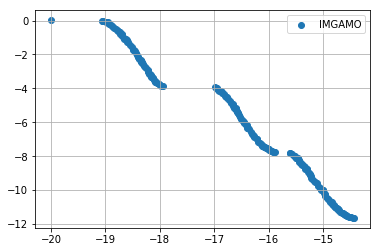

In [10]:
fig, ax = plt.subplots()
solver.result.plot_2d(ax, 0, 1)
plt.show()

In [5]:
np.power(0.1/5, 1/1000)

0.9960956189881034

In [6]:
players = [SimulatedAnnealing(i, temp=5, dec_step=0.996, mutate=hiper_mutate, mutate_args=(0.45, 0.9, 0.1))
           for i in range(nobjs)]
options = imgamo.Options(population_size=25, max_evaluations=-1, max_iterations=1000, exchange_iter=3, change_iter=3,
                         front_max=200, seed=None, verbose=100)

In [7]:
solver = imgamo.IMGAMO(problem, players, options)

In [8]:
solver.run_algorithm()

Iteration:  100
Evaluation count:  [10900. 10900.]
Front size:  20
Elapsed time: 0.1605627169999999

Iteration:  200
Evaluation count:  [21700. 21700.]
Front size:  25
Elapsed time: 0.31399946300000003

Iteration:  300
Evaluation count:  [32600. 32600.]
Front size:  34
Elapsed time: 0.456646632

Iteration:  400
Evaluation count:  [43400. 43400.]
Front size:  44
Elapsed time: 0.6067927449999999

Iteration:  500
Evaluation count:  [54200. 54200.]
Front size:  44
Elapsed time: 0.7723475900000003

Iteration:  600
Evaluation count:  [65100. 65100.]
Front size:  48
Elapsed time: 0.9185818070000002

Iteration:  700
Evaluation count:  [75900. 75900.]
Front size:  51
Elapsed time: 1.0631732570000003

Iteration:  800
Evaluation count:  [86700. 86700.]
Front size:  54
Elapsed time: 1.2122463840000002

Iteration:  900
Evaluation count:  [97600. 97600.]
Front size:  55
Elapsed time: 1.3750850519999998

Iteration:  1000
Evaluation count:  [108400. 108400.]
Front size:  58
Elapsed time: 1.52961795200

In [9]:
solver.result.summary()

Iterations:  1000
Evaluation count:  [108400. 108400.]
Evaluation count per iteration:  [108.4 108.4]
Front size:  58
Time: 1.5522712360000002
Time per iteration: 0.0015522712360000002


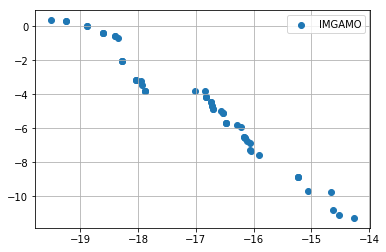

In [10]:
fig, ax = plt.subplots()
solver.result.plot_2d(ax, 0, 1)
plt.show()

In [5]:
players = [SimpleGeneticAlg(i, pc=0.7, pm=0.05, dx=0.001) for i in range(nobjs)]
options = imgamo.Options(population_size=25, max_evaluations=-1, max_iterations=3000, exchange_iter=3, change_iter=3,
                         front_max=200, seed=None, verbose=100)

In [6]:
solver = imgamo.IMGAMO(problem, players, options)

In [7]:
solver.run_algorithm()

Iteration:  100
Evaluation count:  [8400. 8400.]
Front size:  56
Elapsed time: 0.16282706700000027

Iteration:  200
Evaluation count:  [16700. 16700.]
Front size:  84
Elapsed time: 0.338678244

Iteration:  300
Evaluation count:  [25100. 25100.]
Front size:  122
Elapsed time: 0.533330098

Iteration:  400
Evaluation count:  [33400. 33400.]
Front size:  123
Elapsed time: 0.7447595680000001

Iteration:  500
Evaluation count:  [41700. 41700.]
Front size:  132
Elapsed time: 0.9693729060000003

Iteration:  600
Evaluation count:  [50100. 50100.]
Front size:  154
Elapsed time: 1.2182835079999998

Iteration:  700
Evaluation count:  [58400. 58400.]
Front size:  197
Elapsed time: 1.49786705

Iteration:  800
Evaluation count:  [66700. 66700.]
Front size:  200
Elapsed time: 1.8632894149999997

Iteration:  900
Evaluation count:  [75100. 75100.]
Front size:  200
Elapsed time: 2.179603436

Iteration:  1000
Evaluation count:  [83400. 83400.]
Front size:  200
Elapsed time: 2.4844415619999998

Iteration: 

In [8]:
solver.result.summary()

Iterations:  3000
Evaluation count:  [250000. 250000.]
Evaluation count per iteration:  [83.33333333 83.33333333]
Front size:  196
Time: 9.247663278000001
Time per iteration: 0.0030825544260000004


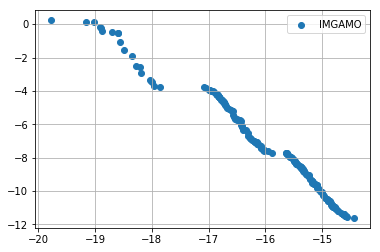

In [9]:
fig, ax = plt.subplots()
solver.result.plot_2d(ax, 0, 1)
plt.show()

In [10]:
import copy
from scipy.optimize import minimize
class ScipyMinimize(Player):
    def __init__(self, player_id, method='L-BFGS-B', niter=10):
        super(ScipyMinimize, self).__init__(player_id)
        self.method = method
        self.options = {'maxiter': niter, 'disp': False}

    def optimize(self, solutions, solutions_eval, pattern, problem):
        def func(x, y):
            xx = np.zeros((1, pattern.shape[0]))
            xx[0, pattern] = x[:]
            xx[0, np.logical_not(pattern)] = y[:]
            return problem.evaluate_one(xx, self.player_id)[0]

        evaluation_count = np.zeros(solutions_eval.shape[1])
        new_solutions = copy.deepcopy(solutions)

        bnds = []
        for i in range(len(problem.bounds)):
            if pattern[i]:
                bnds.append(problem.bounds[i])
        

        for i in range(new_solutions.shape[0]):
            x = new_solutions[i, pattern]
            y = new_solutions[i, np.logical_not(pattern)]
            res = minimize(func, x, (y,), method=self.method, bounds=tuple(bnds), options=self.options)
            new_solutions[i, pattern] = res.x[:]
            new_solutions[i, np.logical_not(pattern)] = y[:]
            evaluation_count[self.player_id] += res.nfev

        new_solutions_eval = problem.evaluate_all(new_solutions)
        evaluation_count += new_solutions.shape[0]

        return new_solutions, new_solutions_eval, evaluation_count, self

In [11]:
players = [ScipyMinimize(i) for i in range(nobjs)]
options = imgamo.Options(population_size=25, max_evaluations=-1, max_iterations=100, exchange_iter=3, change_iter=3,
                         front_max=200, seed=None, verbose=1)

In [12]:
solver = imgamo.IMGAMO(problem, players, options)

In [13]:
solver.run_algorithm()

Iteration:  1
Evaluation count:  [ 474. 1755.]
Front size:  5
Elapsed time: 0.017096872999999846

Iteration:  2
Evaluation count:  [ 574. 2468.]
Front size:  7
Elapsed time: 0.020592951000000248

Iteration:  3
Evaluation count:  [ 774. 3014.]
Front size:  12
Elapsed time: 0.02403537699999969

Iteration:  4
Evaluation count:  [2504. 4399.]
Front size:  7
Elapsed time: 0.026719446000000424

Iteration:  5
Evaluation count:  [3154. 4764.]
Front size:  10
Elapsed time: 0.030330241999999785

Iteration:  6
Evaluation count:  [4106. 5229.]
Front size:  13
Elapsed time: 0.03587460500000006

Iteration:  7
Evaluation count:  [7756. 6329.]
Front size:  15
Elapsed time: 0.03965032899999965

Iteration:  8
Evaluation count:  [9549. 7429.]
Front size:  18
Elapsed time: 0.044565328000000015

Iteration:  9
Evaluation count:  [10965.  8629.]
Front size:  21
Elapsed time: 0.04806245600000025

Iteration:  10
Evaluation count:  [12061. 10254.]
Front size:  21
Elapsed time: 0.05132845400000008

Iteration:  1

Iteration:  84
Evaluation count:  [113286. 107179.]
Front size:  200
Elapsed time: 0.6877845479999998

Iteration:  85
Evaluation count:  [114386. 108804.]
Front size:  200
Elapsed time: 0.6939584080000003

Iteration:  86
Evaluation count:  [115486. 110429.]
Front size:  200
Elapsed time: 0.6990258369999998

Iteration:  87
Evaluation count:  [116686. 112154.]
Front size:  200
Elapsed time: 0.7066059229999997

Iteration:  88
Evaluation count:  [118311. 113254.]
Front size:  200
Elapsed time: 0.7117783119999999

Iteration:  89
Evaluation count:  [119936. 114354.]
Front size:  200
Elapsed time: 0.7172997600000004

Iteration:  90
Evaluation count:  [121661. 115554.]
Front size:  200
Elapsed time: 0.7229172909999999

Iteration:  91
Evaluation count:  [122761. 117179.]
Front size:  200
Elapsed time: 0.7291240569999999

Iteration:  92
Evaluation count:  [123861. 118804.]
Front size:  200
Elapsed time: 0.7345326679999999

Iteration:  93
Evaluation count:  [125061. 120529.]
Front size:  200
Elap

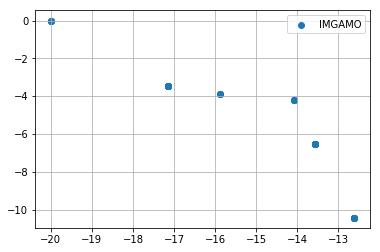

In [14]:
fig, ax = plt.subplots()
solver.result.plot_2d(ax, 0, 1)
plt.show()

In [15]:
14857.81-450

14407.81